In [3]:
%pip install pytesseract
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


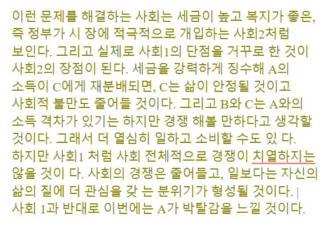

이런 문제를 해결하는 사회는 세금이 높고 복지가 좋은,
즉 정부가 시 장에 적극적으로 개입하는 사회2처럼
보인다. 그리고 실제로 사회1의 단점을 거꾸로 한 것이
사회2의 장점이 된다. 세금을 강력하게 징수해 의

소득이 (에게 재분배되면, (는 삶이 안정될 것이고
사회적 불만도 줄어들 것이다. 그리고 8와 (는 와의
소득 격차가 있기는 하지만 경쟁 해볼 만하다고 생각할
것이다. 그래서 더 열심히 일하고 소비할 수도 있 다.
하지만 사회1 처럼 사회 전체적으로 경쟁이 치열하지는
않을 것이 다. 사회의 경쟁은 줄어들고, 일보다는 자신의
삶의 질에 더 관심을 갖 는 분위기가 형성될 것이다. |
사회 1과 반대로 이번에는 가 박탈감을 느낄 것이다.



In [2]:
'''
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 열기
image = Image.open('input2.JPG')
plt.imshow(image)
plt.axis('off')  # 축을 제거하여 이미지만 표시
plt.show()

# 이미지에서 텍스트 추출
text = pytesseract.image_to_string(image, lang='kor')

# 추출된 텍스트 출력
print(text)
'''

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


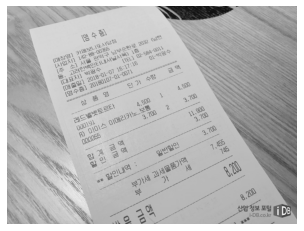

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#배경이 복잡할 때
def remove_background(image):
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 동적 Canny Edge Detection 수행
    def otsu_canny(image):
        # Otsu의 이진화로 임계값 계산
        ret, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Otsu 임계값을 기준으로 저/고임계값 설정
        lower = int(ret * 0.5)  # Otsu 임계값의 50%
        upper = int(ret * 1.5)  # Otsu 임계값의 150%

        # Canny Edge Detection 수행
        edges = cv2.Canny(image, lower, upper)
        return edges, ret  # 엣지와 함께 Otsu 임계값 반환

    # Otsu 기반 동적 Canny Edge Detection 수행
    edges, otsu_thresh = otsu_canny(gray)

    # Otsu 임계값을 이용해 엣지의 평균 값을 동적으로 판단
    dynamic_threshold = otsu_thresh  # Otsu 임계값을 기반으로 동적 임계값 설정

    # 엣지 밀도를 계산하여 배경 복잡도 판단
    if np.mean(edges) > dynamic_threshold:  # Otsu 임계값을 기준으로 배경 복잡도 판단
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # 블러링으로 노이즈 완화
        _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu 이진화
        return binary  # 배경이 제거된 이진화 이미지 반환
    else:
        return gray  # 배경 복잡하지 않으면 원본 그레이스케일 이미지 반환
    
image_path = 'input3.jpg'  # 실제 이미지 파일 경로로 수정하세요

# 이미지를 읽음
image = cv2.imread(image_path)

# 이미지가 정상적으로 읽혔는지 확인
if image is None:
    print(f"Error: Unable to load image {image_path}")
else:
    # 원본 이미지를 처리
    processed_image = remove_background(image)

    # OpenCV는 BGR 형식이므로 RGB 형식으로 변환
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    # matplotlib로 출력
    plt.imshow(processed_image_rgb)
    plt.axis('off')  # 축을 제거하여 이미지만 표시
    plt.show()

In [3]:
# pip install requests
 
import requests
 
api_key = "up_sGtf6pFdPMZADA9r1f2i22pN1musa"
filename = "input.JPG"
 
url = "https://api.upstage.ai/v1/document-ai/ocr"
headers = {"Authorization": f"Bearer {api_key}"}
 
files = {"document": open(filename, "rb")}
response = requests.post(url, headers=headers, files=files)
 
print(response.json())

{'apiVersion': '1.1', 'confidence': 0.9938, 'metadata': {'pages': [{'height': 351, 'page': 1, 'width': 618}]}, 'mimeType': 'multipart/form-data', 'modelVersion': 'ocr-2.2.1', 'numBilledPages': 1, 'pages': [{'confidence': 0.9938, 'height': 351, 'id': 0, 'text': '동해물과 백두산이 마르고 닳도록, 하느 \n님이 보우하사 우리 나라 만세 무궁화 삼 \n천리 화려강산 대한사람 대한으로 길이 \n보전하세 남산 위에 저 소나무 철갑을 두 \n른 듯, 바람 서리 불변함은 우리 기상일 \n세 가을하늘 공활한데 높고 구름없이', 'width': 618, 'words': [{'boundingBox': {'vertices': [{'x': 11, 'y': 17}, {'x': 141, 'y': 17}, {'x': 141, 'y': 49}, {'x': 11, 'y': 49}]}, 'confidence': 0.9987, 'id': 0, 'text': '동해물과'}, {'boundingBox': {'vertices': [{'x': 158, 'y': 17}, {'x': 283, 'y': 17}, {'x': 283, 'y': 49}, {'x': 158, 'y': 49}]}, 'confidence': 0.9992, 'id': 1, 'text': '백두산이'}, {'boundingBox': {'vertices': [{'x': 307, 'y': 17}, {'x': 401, 'y': 17}, {'x': 401, 'y': 48}, {'x': 307, 'y': 48}]}, 'confidence': 0.9991, 'id': 2, 'text': '마르고'}, {'boundingBox': {'vertices': [{'x': 421, 'y': 17}, {'x': 523, 'y': 17}, {'x': 523